## Objetivo

O grande objetivo do Datathon é você como cientista de dados criar uma proposta preditiva ou como analista de dados realizar uma proposta
analítica para demonstrar o impacto que a ONG "Passos Mágicos" tem realizado sobre a comunidade que atende. A associação busca instrumentalizar o uso da educação como ferramenta para a mudança das
condições de vida das crianças e jovens em vulnerabilidade social. Com base no dataset de pesquisa extensiva do desenvolvimento educacional no período de 2020, 2021 e 2023, você pode entregar uma das seguintes propostas:

* Proposta analítica: criar um storytelling para
demonstrar os impactos que a ONG "Passos Mágicos" realizou sobre a performance de estudantes e levantar indicadores de performance. A ideia é realizar um dashboard e um storytelling contando uma história com os dados para auxiliar a Passos Mágicos a tomar as melhores decisôes com base nos indicadores e conhecer o perfil dos estudantes.

* Proposta preditiva: criar um modelo preditivo para prever o comporta-
mento do estudante com base em algumas variáveis que podem ser
cruciais para a identificação do desenvolvimento do estudante. Na
/ proposta preditiva, você pode utilizar a criatividade para propor
uma solução de algoritmo supervisionado ou não supervisionado.
A ideia é utilizar um dos conhecimentos aprendidos no curso
como solução (machine learning, deep learning ou processa-
mento de linguagem natural).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE5/tech_challenge_fase5/dados/PEDE_PASSOS_DATASET_FIAP.csv', sep=';')
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


In [3]:
df.shape

(1349, 69)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [5]:
def selecionar_colunas_ano(df, ano):
    # Filtra as colunas que terminam com o ano ou que são 'NOME'
    colunas_ano = [col for col in df.columns if col.endswith(f'_{ano}') or col == 'NOME']

    # Cria um novo DataFrame com as colunas filtradas e remove o sufixo de ano
    df_ano = df[colunas_ano].copy()
    df_ano.columns = [col.rsplit('_', 1)[0] if '_' in col else col for col in df_ano.columns]

    # Adiciona a coluna 'ANO' com o valor especificado
    df_ano['ANO'] = ano

    return df_ano

In [6]:
def limpar_dados(df):
    # Remove linhas onde todas as colunas, exceto 'NOME' e 'ANO', são NaN
    df_limpo = df.dropna(how='all', subset=df.columns.difference(['NOME', 'ANO']))

    return df_limpo

In [7]:
def processar_dados_ano(df, ano: int, exibir_stats: bool = True) -> pd.DataFrame:
    # Filtrar colunas relevantes e linhas para o ano especificado
    df_filtrado = selecionar_colunas_ano(df, ano)
    df_ano = df_filtrado.query('ANO == @ano')

    # Converter colunas de indicadores para float, lidando com valores inválidos
    colunas_indicadores = ['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN']
    df_ano[colunas_indicadores] = df_ano[colunas_indicadores].apply(pd.to_numeric, errors='coerce')

    # Limpar o DataFrame
    df_ano_limpo = limpar_dados(df_ano)

    return df_ano_limpo

In [8]:
df_2020_limpo = processar_dados_ano(df, 2020)
df_2021_limpo = processar_dados_ano(df, 2021)
df_2022_limpo = processar_dados_ano(df, 2022)

In [11]:
print(f"\n 2020\n")

print(f"\n----------------------------- Dimensões ----------------------------\n")
# Dimensões do DataFrame
print(df_2020_limpo.shape)

print(f"\n---------------------------- Informação ----------------------------\n")
# Usando info()
df_2020_limpo.info()

print(f"\n-------------------------- Valores nulos ---------------------------\n")
# Contagem de valores nulos
print(df_2020_limpo.isnull().sum())

print(f"\n------------------------ Valores Duplicado ------------------------\n")
# Verificar duplicados
print(df_2020_limpo.duplicated().sum())


 2020


----------------------------- Dimensões ----------------------------

(728, 20)

---------------------------- Informação ----------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 1347
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO  728 non-null    object 
 1   NOME                      728 non-null    object 
 2   IDADE_ALUNO               728 non-null    object 
 3   ANOS_PM                   728 non-null    object 
 4   FASE_TURMA                728 non-null    object 
 5   PONTO_VIRADA              702 non-null    object 
 6   INDE                      727 non-null    float64
 7   INDE_CONCEITO             728 non-null    object 
 8   PEDRA                     728 non-null    object 
 9   DESTAQUE_IEG              728 non-null    object 
 10  DESTAQUE_IDA              728 non-null    object 
 11  DESTAQUE_IPV       

In [12]:
print(f"\n 2021\n")

print(f"\n----------------------------- Dimensões ----------------------------\n")
# Dimensões do DataFrame
print(df_2021_limpo.shape)

print(f"\n---------------------------- Informação ----------------------------\n")
# Usando info()
df_2021_limpo.info()

print(f"\n-------------------------- Valores nulos ---------------------------\n")
# Contagem de valores nulos
print(df_2021_limpo.isnull().sum())

print(f"\n------------------------ Valores Duplicado ------------------------\n")
# Verificar duplicados
print(df_2021_limpo.duplicated().sum())


 2021


----------------------------- Dimensões ----------------------------

(686, 22)

---------------------------- Informação ----------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 686 entries, 0 to 1347
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NOME                      686 non-null    object 
 1   FASE                      686 non-null    float64
 2   TURMA                     686 non-null    object 
 3   INSTITUICAO_ENSINO_ALUNO  686 non-null    object 
 4   SINALIZADOR_INGRESSANTE   686 non-null    object 
 5   PEDRA                     686 non-null    object 
 6   INDE                      684 non-null    float64
 7   IAA                       686 non-null    float64
 8   IEG                       686 non-null    float64
 9   IPS                       686 non-null    float64
 10  IDA                       686 non-null    float64
 11  IPP                

In [13]:
print(f"\n 2022\n")
print(f"\n----------------------------- Dimensões ----------------------------\n")
# Dimensões do DataFrame
print(df_2022_limpo.shape)

print(f"\n---------------------------- Informação ----------------------------\n")
# Usando info()
df_2022_limpo.info()

print(f"\n-------------------------- Valores nulos ---------------------------\n")
# Contagem de valores nulos
print(df_2022_limpo.isnull().sum())

print(f"\n------------------------ Valores Duplicado ------------------------\n")
# Verificar duplicados
print(df_2022_limpo.duplicated().sum())


 2022


----------------------------- Dimensões ----------------------------

(862, 32)

---------------------------- Informação ----------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 1 to 1348
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NOME            862 non-null    object 
 1   FASE            862 non-null    float64
 2   TURMA           862 non-null    object 
 3   ANO_INGRESSO    862 non-null    float64
 4   BOLSISTA        862 non-null    object 
 5   INDE            862 non-null    float64
 6   CG              862 non-null    float64
 7   CF              862 non-null    float64
 8   CT              862 non-null    float64
 9   PEDRA           862 non-null    object 
 10  DESTAQUE_IEG    862 non-null    object 
 11  DESTAQUE_IDA    862 non-null    object 
 12  DESTAQUE_IPV    862 non-null    object 
 13  IAA             862 non-null    float64
 14  IEG           

In [14]:
def limpar_coluna_invalida(dfs, coluna):
    """
    Remove as linhas onde a coluna especificada tem valores NaN das colunas INDE, IAA, IEG, IPS, IDA, IPP, IPV, IAN

    Parameters:
    - dfs: Um dicionário onde as chaves são nomes dos DataFrames e os valores são os próprios DataFrames.
    - coluna: Nome da coluna para checar valores NaN.
    """
    for nome_df, df in dfs.items():
        # Remove linhas com NaN na coluna especificada
        df.dropna(subset=[coluna], inplace=True)
        # Opcional: Você pode armazenar os DataFrames limpos de volta no dicionário
        dfs[nome_df] = df

# Lista de DataFrames e o nome correspondente
dfs = {
    'df_2020_limpo': df_2020_limpo,
    'df_2021_limpo': df_2021_limpo,
    'df_2022_limpo': df_2022_limpo
}

# Chama a função para limpar todos os DataFrames
limpar_coluna_invalida(dfs, 'INDE')

In [15]:
def limpar_nulos(df: pd.DataFrame, valor: str = '#NULO!') -> pd.DataFrame:
    # Cria uma máscara onde o valor é '#NULO!'
    mask = df.applymap(lambda x: x == valor)
    # Filtra e retorna o DataFrame onde pelo menos uma célula na linha é diferente de '#NULO!'
    return df[~mask.all(axis=1)]

In [16]:
# Criar novas colunas para FASE e TURMA
df_2020_limpo[['FASE', 'TURMA']] = df_2020_limpo['FASE_TURMA'].str.extract(r'(\d+)(\D+)')

# Converter a coluna 'FASE' para numérico
df_2020_limpo['FASE'] = pd.to_numeric(df_2020_limpo['FASE'])

In [17]:
df_2020_limpo = limpar_nulos(df_2020_limpo)
df_2021_limpo = limpar_nulos(df_2021_limpo)
df_2022_limpo = limpar_nulos(df_2022_limpo)

<ipython-input-15-59d8ad7bfe86>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: x == valor)
<ipython-input-15-59d8ad7bfe86>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: x == valor)
<ipython-input-15-59d8ad7bfe86>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: x == valor)


In [18]:
print(df_2020_limpo.shape)
print(df_2021_limpo.shape)
print(df_2022_limpo.shape)

(727, 22)
(684, 22)
(862, 32)


In [19]:
 # Lista de DataFrames limpos
dfs_limpos = [df_2020_limpo, df_2021_limpo, df_2022_limpo]

# Concatenando todos os DataFrames em um único DataFrame final
df_concat = pd.concat(dfs_limpos, ignore_index=True)

In [20]:
# Converter a coluna 'IDADE_ALUNO' para inteiro, tratando valores não numéricos
df_concat['IDADE_ALUNO'] = pd.to_numeric(df_concat['IDADE_ALUNO'], errors='coerce').fillna(0).astype(int)

In [21]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO  1411 non-null   object 
 1   NOME                      2273 non-null   object 
 2   IDADE_ALUNO               2273 non-null   int64  
 3   ANOS_PM                   727 non-null    object 
 4   FASE_TURMA                727 non-null    object 
 5   PONTO_VIRADA              2247 non-null   object 
 6   INDE                      2273 non-null   float64
 7   INDE_CONCEITO             727 non-null    object 
 8   PEDRA                     2273 non-null   object 
 9   DESTAQUE_IEG              1589 non-null   object 
 10  DESTAQUE_IDA              1589 non-null   object 
 11  DESTAQUE_IPV              1565 non-null   object 
 12  IAA                       2273 non-null   float64
 13  IEG                       2273 non-null   float64
 14  IPS     

In [22]:
df_concat.shape

(2273, 43)

In [23]:
df_concat.head()

,INSTITUICAO_ENSINO_ALUNO,NOME,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,...,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Escola Pública,ALUNO-3,12,2,3H,Não,7.856390,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381391,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
print('2020')
print(df_2020_limpo.columns)
print()
print('2021')
print(df_2021_limpo.columns)
print()
print('2022')
print(df_2022_limpo.columns)

2020
Index(['INSTITUICAO_ENSINO_ALUNO', 'NOME', 'IDADE_ALUNO', 'ANOS_PM',
       'FASE_TURMA', 'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA',
       'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS',
       'IDA', 'IPP', 'IPV', 'IAN', 'ANO', 'FASE', 'TURMA'],
      dtype='object')

2021
Index(['NOME', 'FASE', 'TURMA', 'INSTITUICAO_ENSINO_ALUNO',
       'SINALIZADOR_INGRESSANTE', 'PEDRA', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA',
       'IPP', 'REC_EQUIPE_1', 'REC_EQUIPE_2', 'REC_EQUIPE_3', 'REC_EQUIPE_4',
       'PONTO_VIRADA', 'IPV', 'IAN', 'NIVEL_IDEAL', 'DEFASAGEM', 'ANO'],
      dtype='object')

2022
Index(['NOME', 'FASE', 'TURMA', 'ANO_INGRESSO', 'BOLSISTA', 'INDE', 'CG', 'CF',
       'CT', 'PEDRA', 'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA',
       'IEG', 'IPS', 'IDA', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING', 'QTD_AVAL',
       'IPP', 'REC_AVA_1', 'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4',
       'INDICADO_BOLSA', 'PONTO_VIRADA', 'IPV', 'IAN', 'NIVEL_IDEAL', 'AN

In [25]:
# Converter a coluna 'IDADE_ALUNO' para inteiro, tratando valores não numéricos
df_2020_limpo['IDADE_ALUNO'] = pd.to_numeric(df_2020_limpo['IDADE_ALUNO'], errors='coerce').fillna(0).astype(int)

In [26]:
df_2021_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 1347
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NOME                      684 non-null    object 
 1   FASE                      684 non-null    float64
 2   TURMA                     684 non-null    object 
 3   INSTITUICAO_ENSINO_ALUNO  684 non-null    object 
 4   SINALIZADOR_INGRESSANTE   684 non-null    object 
 5   PEDRA                     684 non-null    object 
 6   INDE                      684 non-null    float64
 7   IAA                       684 non-null    float64
 8   IEG                       684 non-null    float64
 9   IPS                       684 non-null    float64
 10  IDA                       684 non-null    float64
 11  IPP                       684 non-null    float64
 12  REC_EQUIPE_1              684 non-null    object 
 13  REC_EQUIPE_2              684 non-null    object 
 14  REC_EQUIPE_3  

In [27]:
# Exportar os DataFrames para arquivos CSV
df_2020_limpo.to_csv('df_2020_limpo.csv', index=False)
df_2021_limpo.to_csv('df_2021_limpo.csv', index=False)
df_2022_limpo.to_csv('df_2022_limpo.csv', index=False)
df_concat.to_csv('df_concat.csv', index=False)

In [28]:
total_alunos_2020 = df_2020_limpo['NOME'].nunique()
total_alunos_2021 = df_2021_limpo['NOME'].nunique()
total_alunos_2022 = df_2022_limpo['NOME'].nunique()

print(f"Total de alunos em 2020: {total_alunos_2020}")
print(f"Total de alunos em 2021: {total_alunos_2021}")
print(f"Total de alunos em 2022: {total_alunos_2022}")


Total de alunos em 2020: 727
Total de alunos em 2021: 684
Total de alunos em 2022: 862


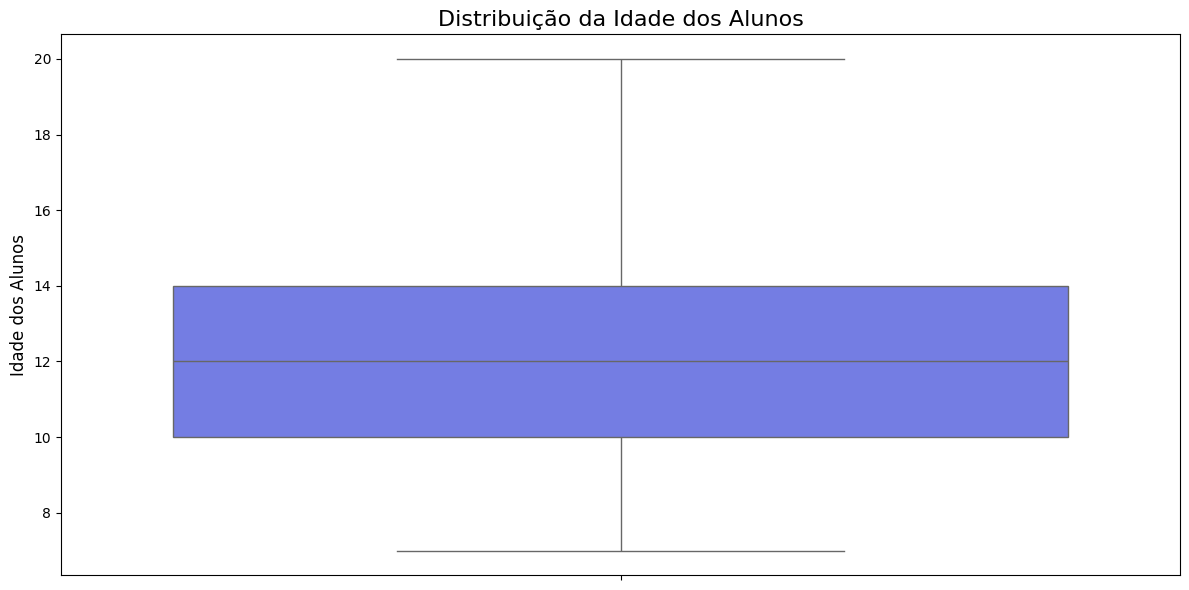

In [120]:
df_idade_media = df_concat[df_concat['IDADE_ALUNO'] > 0]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_idade_media, y='IDADE_ALUNO', color='#626EF5')

plt.title('Distribuição da Idade dos Alunos', fontsize=16)
plt.ylabel('Idade dos Alunos', fontsize=12)
plt.xlabel('')

plt.tight_layout()


plt.show()

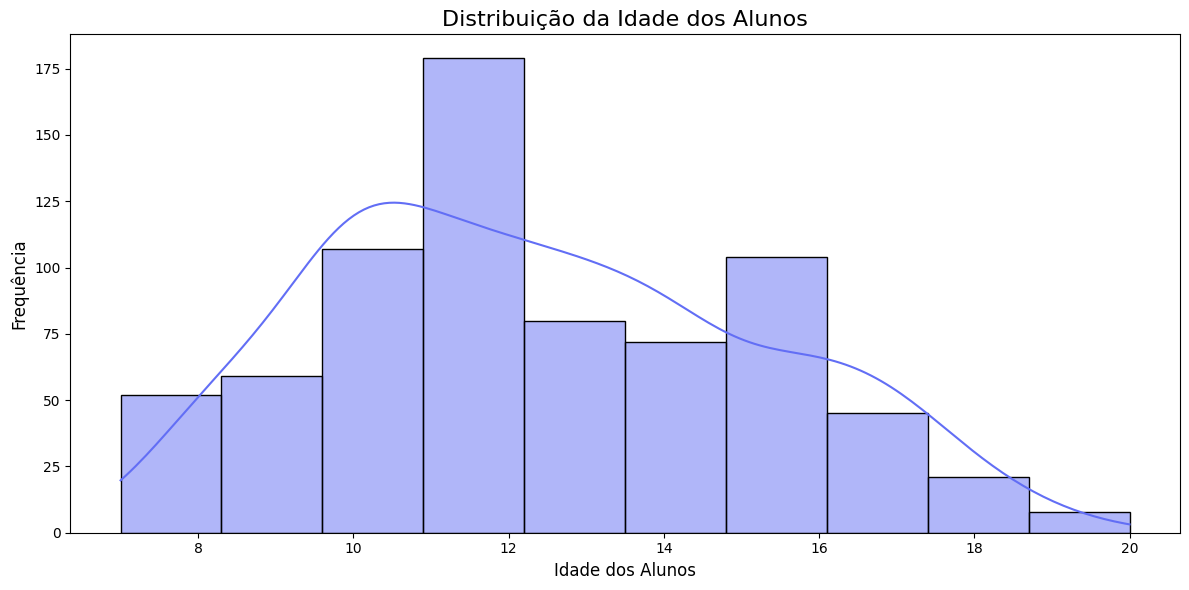

In [121]:
df_filtered = df_concat[df_concat['IDADE_ALUNO'] > 0]

plt.figure(figsize=(12, 6))
sns.histplot(data=df_filtered, x='IDADE_ALUNO', color='#626EF5', bins=10, kde=True)

plt.title('Distribuição da Idade dos Alunos', fontsize=16)
plt.xlabel('Idade dos Alunos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()


In [30]:
# Remover alunos com idade 0
df_idade_valida = df_concat[df_concat['IDADE_ALUNO'] > 0]

# Calcular a média, máxima e mínima idade dos alunos
media_idade = df_idade_valida['IDADE_ALUNO'].mean()
idade_maxima = df_idade_valida['IDADE_ALUNO'].max()
idade_minima = df_idade_valida['IDADE_ALUNO'].min()

print(f"Média da idade dos alunos: {media_idade:.2f}")
print(f"Idade máxima dos alunos: {idade_maxima}")
print(f"Idade mínima dos alunos: {idade_minima}")


Média da idade dos alunos: 12.41
Idade máxima dos alunos: 20
Idade mínima dos alunos: 7


<ipython-input-118-c345f5ada1e8>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-118-c345f5ada1e8>:6: UserWarning:


The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.



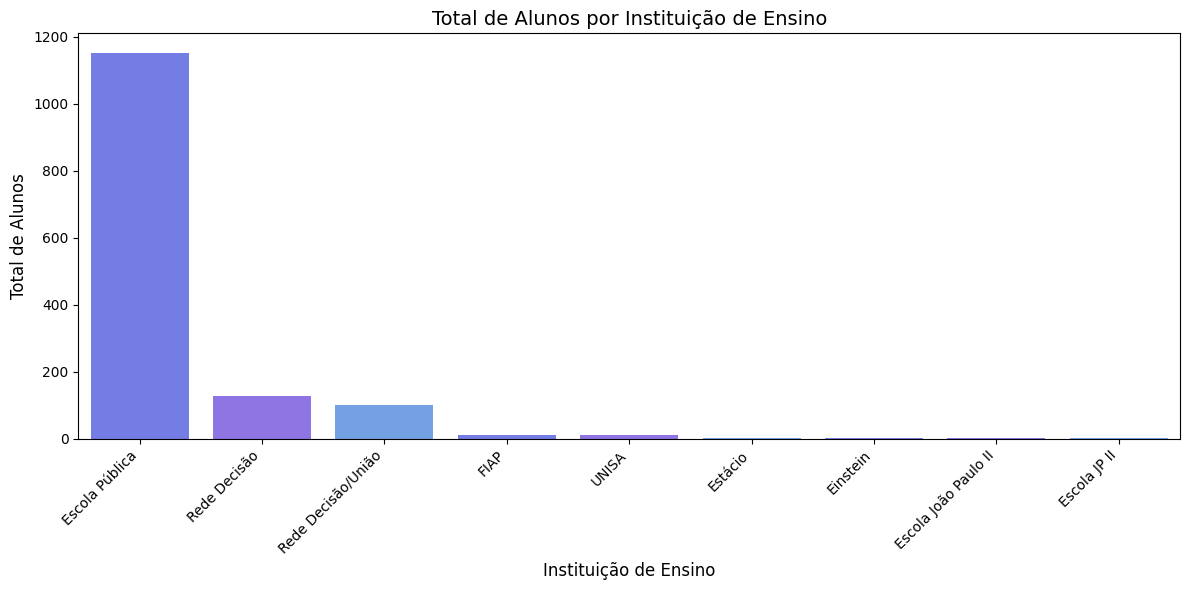

In [118]:
instituicao_counts = df_concat['INSTITUICAO_ENSINO_ALUNO'].value_counts().reset_index()
instituicao_counts.columns = ['Instituição de Ensino', 'Total de Alunos']

plt.figure(figsize=(12, 6))

sns.barplot(data=instituicao_counts, x='Instituição de Ensino', y='Total de Alunos', palette=['#626EF5', '#8562F5', '#629DF5'])

plt.title('Total de Alunos por Instituição de Ensino', fontsize=14)
plt.xlabel('Instituição de Ensino', fontsize=12)
plt.ylabel('Total de Alunos', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

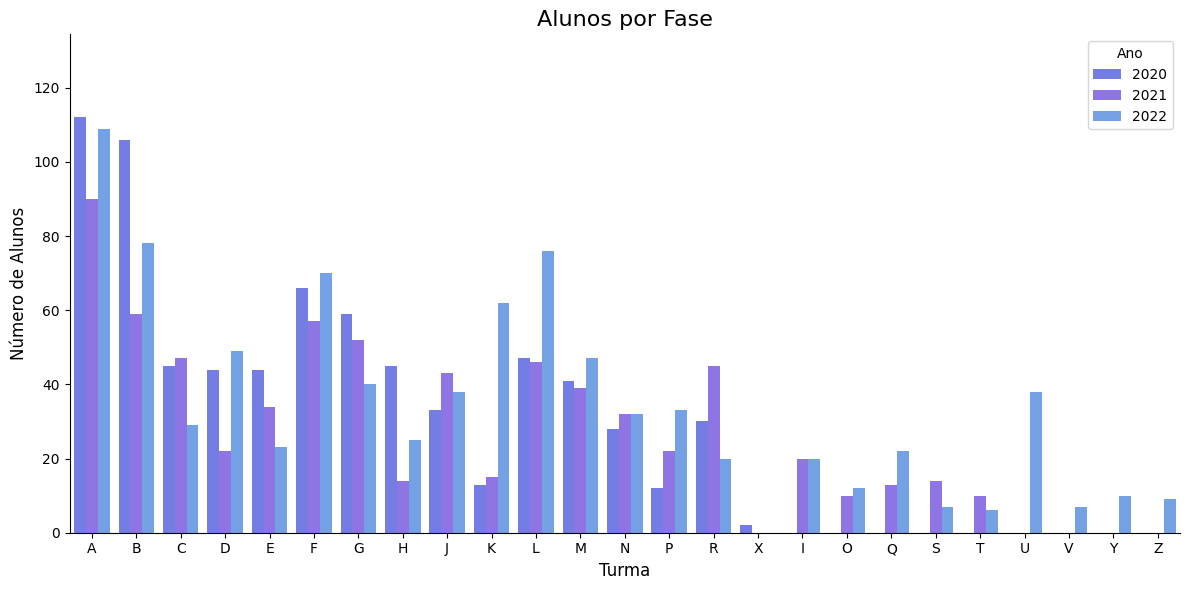

In [117]:
df_grouped = df_concat.groupby(['ANO', 'TURMA']).size().reset_index(name='Alunos')

df_grouped['ANO'] = df_grouped['ANO'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='TURMA', y='Alunos', hue='ANO', palette=['#626EF5', '#8562F5', '#629DF5'], dodge=True)

y_max = df_grouped['Alunos'].max() * 1.2
plt.ylim(0, y_max)

plt.title('Alunos por Fase', fontsize=16)
plt.xlabel('Turma', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.legend(title='Ano')
sns.despine()
plt.tight_layout()

plt.show()


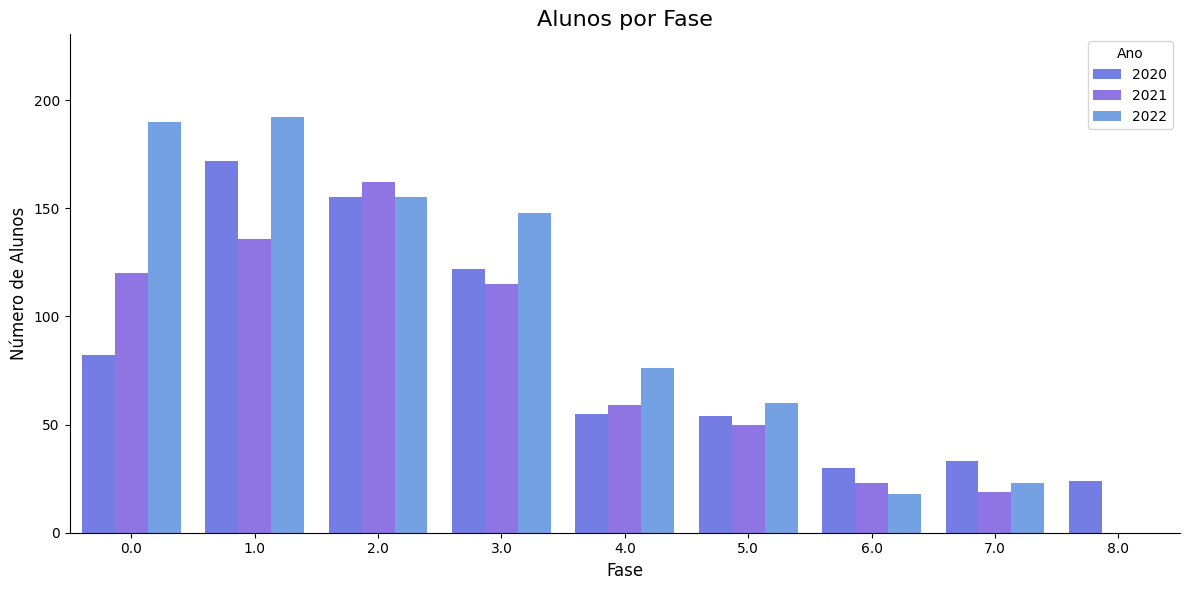

In [116]:
df_grouped = df_concat.groupby(['ANO', 'FASE']).size().reset_index(name='Alunos')

df_grouped['ANO'] = df_grouped['ANO'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='FASE', y='Alunos', hue='ANO', palette=['#626EF5', '#8562F5', '#629DF5'], dodge=True)

y_max = df_grouped['Alunos'].max() * 1.2
plt.ylim(0, y_max)

plt.title('Alunos por Fase', fontsize=16)
plt.xlabel('Fase', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.legend(title='Ano')
sns.despine()
plt.tight_layout()

plt.show()

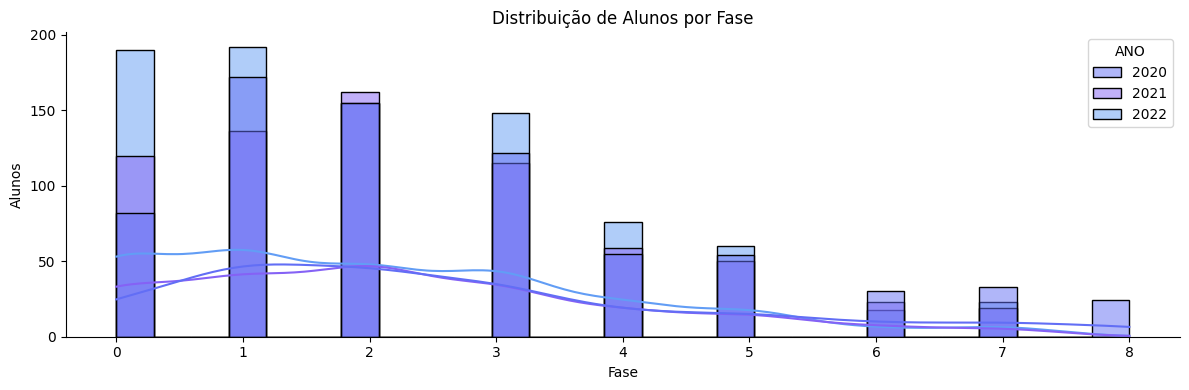

In [115]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.histplot(
    data=df_concat,
    x='FASE',
    hue='ANO',
    kde=True,
    palette=['#626EF5', '#8562F5', '#629DF5'],
    ax=ax
)


plt.title('Distribuição de Alunos por Fase', fontsize=12)


y_max = df_concat.groupby(['ANO', 'FASE']).size().max() * 1.2
plt.yticks(np.arange(0, y_max, 50))


ax.set_xlabel('Fase', fontsize=10)
ax.set_ylabel('Alunos', fontsize=10)


sns.despine()

plt.tight_layout()

plt.show()

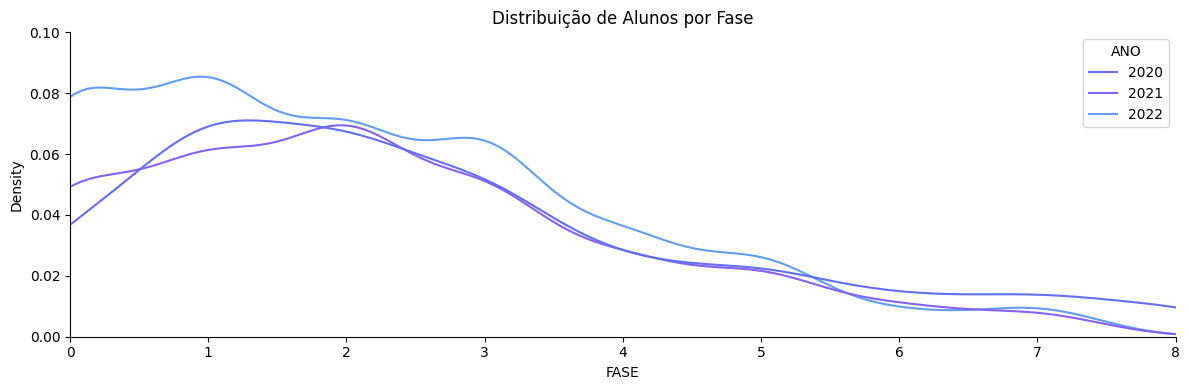

In [82]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.kdeplot(
    data=df_concat,
    x='FASE',
    hue='ANO',
    palette=['#626EF5', '#8562F5', '#629DF5'],
    ax=ax
)

plt.title('Distribuição de Alunos por Fase', fontsize=12)

ax.set_xlim(0, 8)

plt.yticks(np.arange(0, 0.12, 0.02))

sns.despine()
plt.tight_layout()
plt.show()

<ipython-input-114-68928ac3cad9>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-114-68928ac3cad9>:5: UserWarning:


The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.



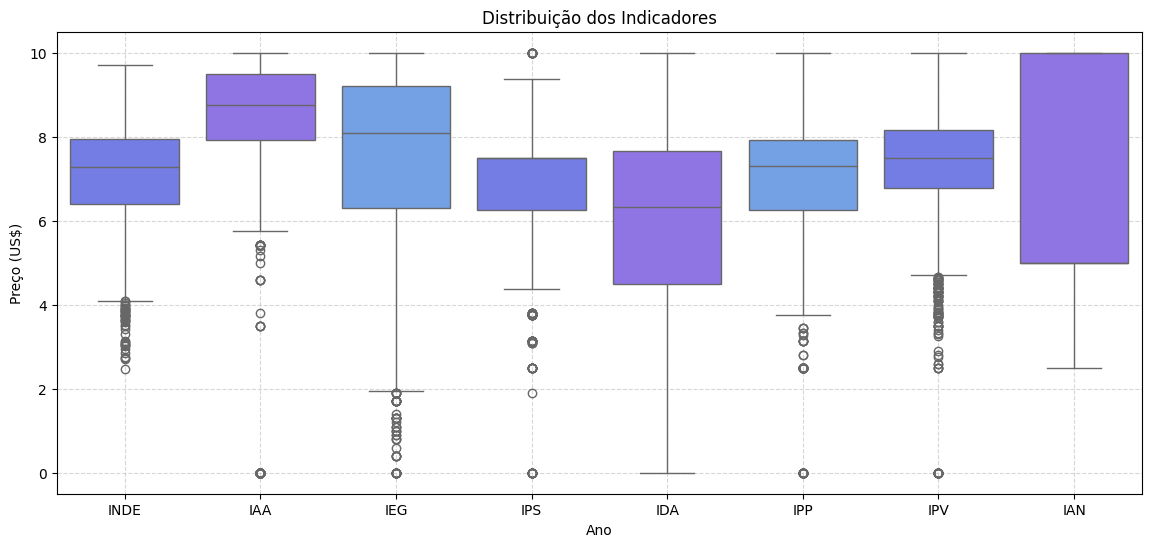

In [114]:
indicadores = df_concat[['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN']]
fig, ax = plt.subplots(figsize=(14, 6))

indicadores_long = indicadores.melt(var_name='Indicador', value_name='Valor')
sns.boxplot(data=indicadores_long, x='Indicador', y='Valor', ax=ax, palette=['#626EF5', '#8562F5', '#629DF5'])

ax.set_title('Distribuição dos Indicadores')
ax.set_xlabel('Ano')
ax.set_ylabel('Preço (US$)')

ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


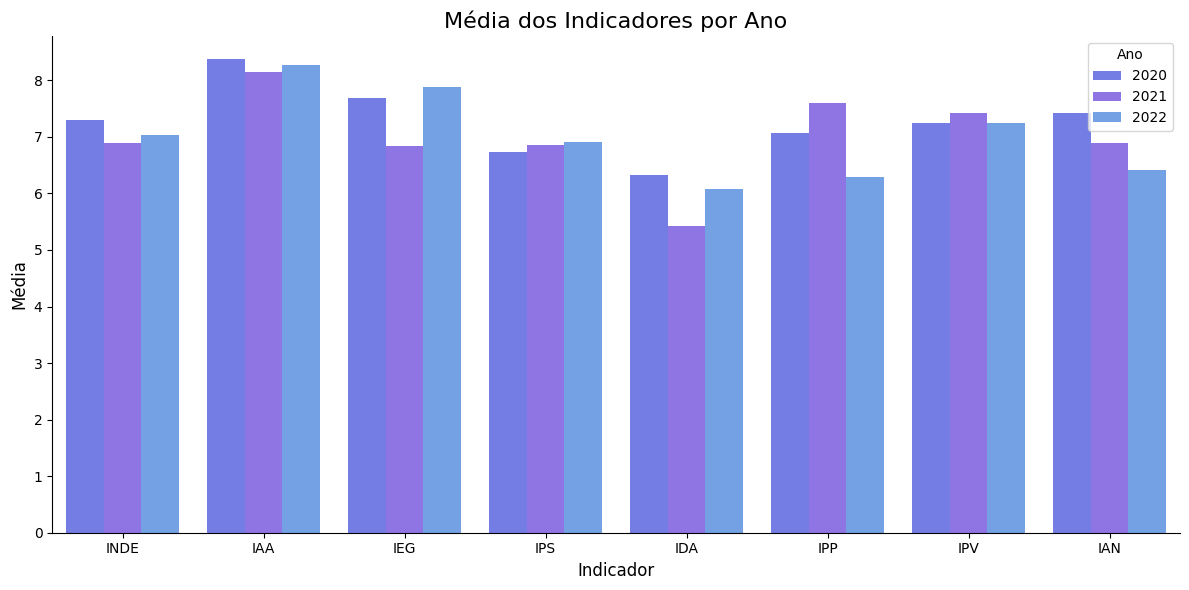

In [111]:
indicadores = ['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN']
media_2020 = df_2020_limpo[indicadores].mean()
media_2021 = df_2021_limpo[indicadores].mean()
media_2022 = df_2022_limpo[indicadores].mean()

data = {
    'Indicador': indicadores * 3,
    'Média': list(media_2020) + list(media_2021) + list(media_2022),
    'Ano': ['2020'] * len(indicadores) + ['2021'] * len(indicadores) + ['2022'] * len(indicadores)
}
df_media = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_media, x='Indicador', y='Média', hue='Ano', palette=['#626EF5', '#8562F5', '#629DF5'])

plt.title('Média dos Indicadores por Ano', fontsize=16)
plt.xlabel('Indicador', fontsize=12)
plt.ylabel('Média', fontsize=12)
plt.legend(title='Ano', loc='upper right')

sns.despine()
plt.tight_layout()

plt.show()

Text(0, 0.5, 'Número de Alunos')

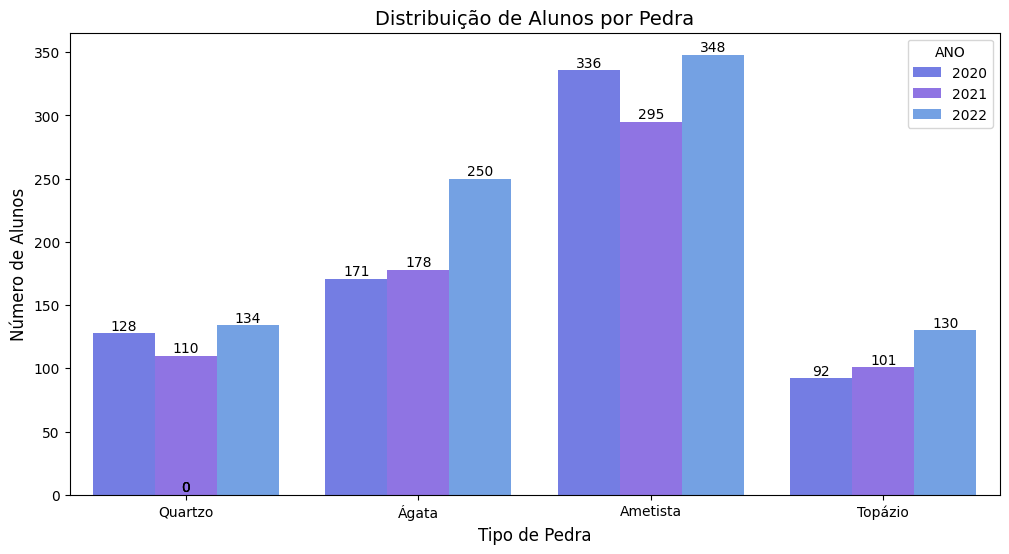

In [109]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=df_concat, x='PEDRA', hue='ANO', palette=['#626EF5', '#8562F5', '#629DF5'],
              order=['Quartzo', 'Ágata', 'Ametista', 'Topázio'], ax=ax)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = height
    ax.annotate(format(height, '.0f'),  # Valor a ser mostrado
                (x, y),  # Posição
                ha='center', va='center',  # Alinhamento
                xytext=(0, 5),  # Offset vertical para evitar sobreposição
                textcoords='offset points',
                fontsize=10, color='black')

plt.title('Distribuição de Alunos por Pedra', fontsize=14)
ax.set_xlabel('Tipo de Pedra', fontsize=12)
ax.set_ylabel('Número de Alunos', fontsize=12)



In [44]:
print(df_concat.columns)

Index(['INSTITUICAO_ENSINO_ALUNO', 'NOME', 'IDADE_ALUNO', 'ANOS_PM',
       'FASE_TURMA', 'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA',
       'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS',
       'IDA', 'IPP', 'IPV', 'IAN', 'ANO', 'FASE', 'TURMA',
       'SINALIZADOR_INGRESSANTE', 'REC_EQUIPE_1', 'REC_EQUIPE_2',
       'REC_EQUIPE_3', 'REC_EQUIPE_4', 'NIVEL_IDEAL', 'DEFASAGEM',
       'ANO_INGRESSO', 'BOLSISTA', 'CG', 'CF', 'CT', 'NOTA_PORT', 'NOTA_MAT',
       'NOTA_ING', 'QTD_AVAL', 'REC_AVA_1', 'REC_AVA_2', 'REC_AVA_3',
       'REC_AVA_4', 'INDICADO_BOLSA'],
      dtype='object')


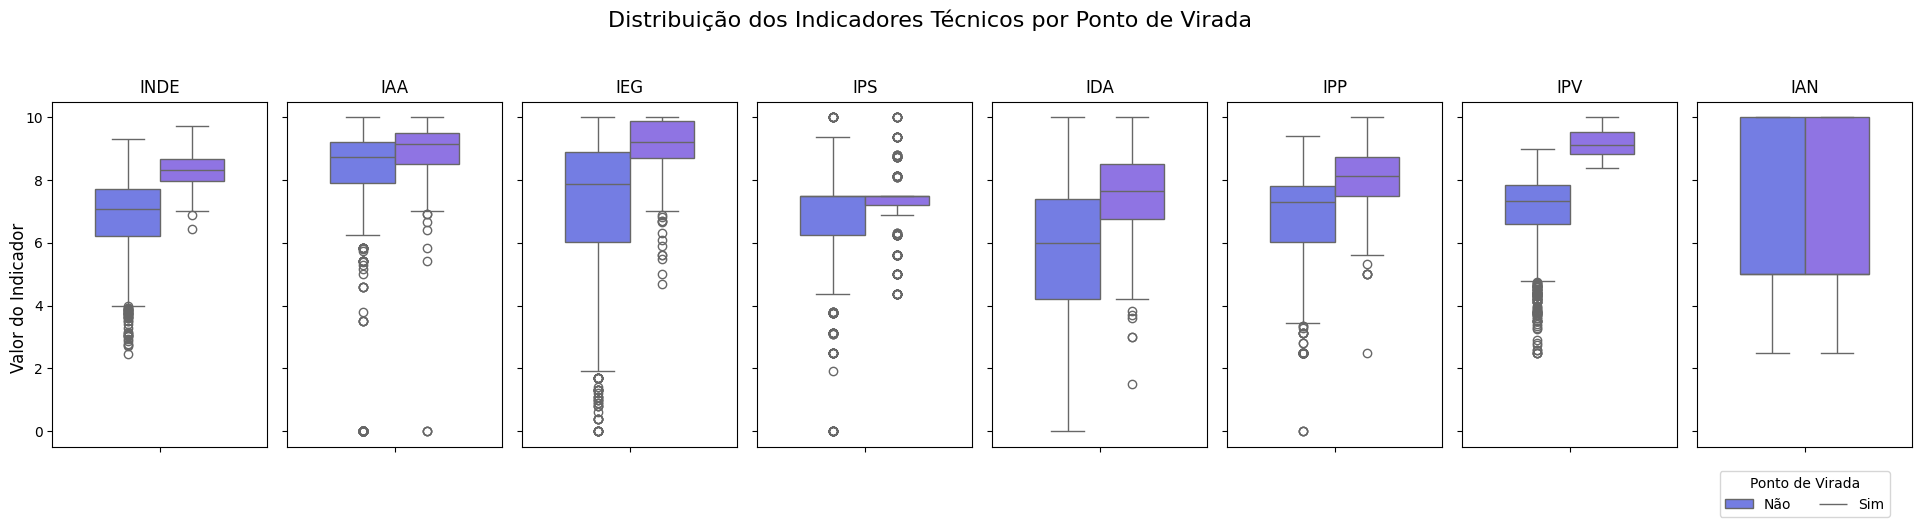

In [108]:
indicadores = ['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN']

fig, axs = plt.subplots(1, len(indicadores), figsize=(20, 6), sharey=True)

fig.suptitle('Distribuição dos Indicadores Técnicos por Ponto de Virada', fontsize=16)

for i, indicator in enumerate(indicadores):
    sns.boxplot(data=df_concat, hue='PONTO_VIRADA', y=indicator, ax=axs[i],
                 palette=['#626EF5', '#8562F5'], width=0.6)
    axs[i].set_title(f'{indicator}', fontsize=12)
    axs[i].set_xlabel('')  # Sem rótulo no eixo x
    axs[i].set_ylabel('')  # Sem rótulo no eixo y
    axs[i].legend_.remove()  # Remove a legenda dos subplots individuais

fig.text(0.04, 0.5, 'Valor do Indicador', va='center', rotation='vertical', fontsize=12)

plt.legend(title='Ponto de Virada', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           ncol=2, labels=['Não', 'Sim'])

plt.tight_layout(rect=[0.04, 0.1, 1, 0.95])

plt.show()

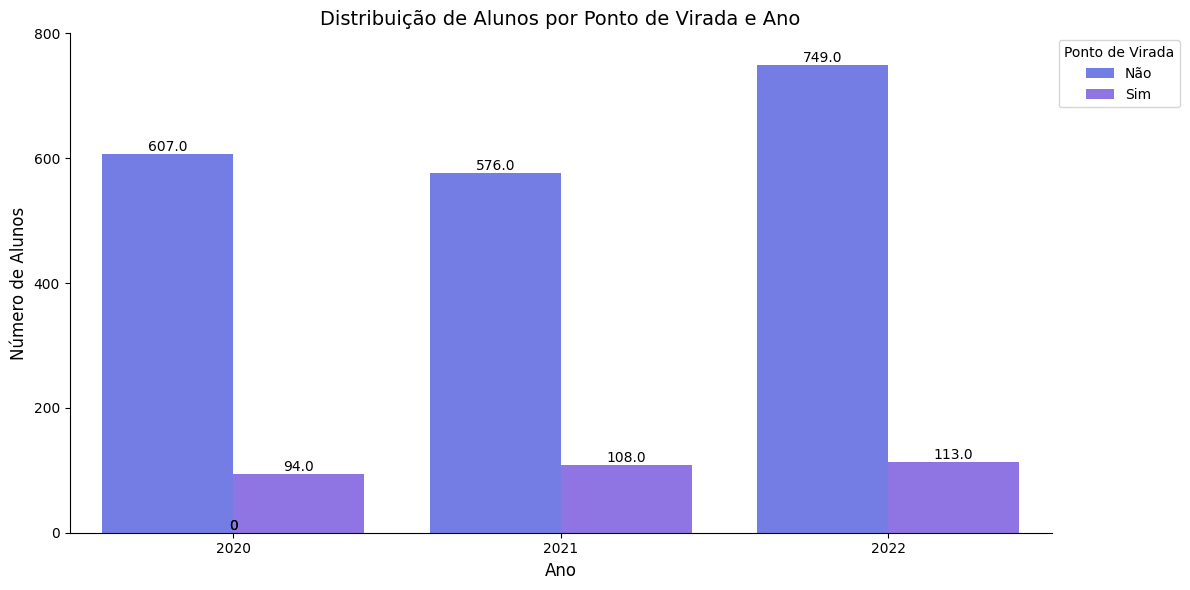

In [107]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=df_concat, x='ANO', hue='PONTO_VIRADA', palette=['#626EF5', '#8562F5'], ax=ax)

plt.title('Distribuição de Alunos por Ponto de Virada e Ano', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Alunos', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points',
                fontsize=10, color='black')

plt.yticks(np.arange(0, 1000, 200))

plt.legend(title='Ponto de Virada', loc='upper left', bbox_to_anchor=(1, 1))

sns.despine()

plt.tight_layout()

plt.show()

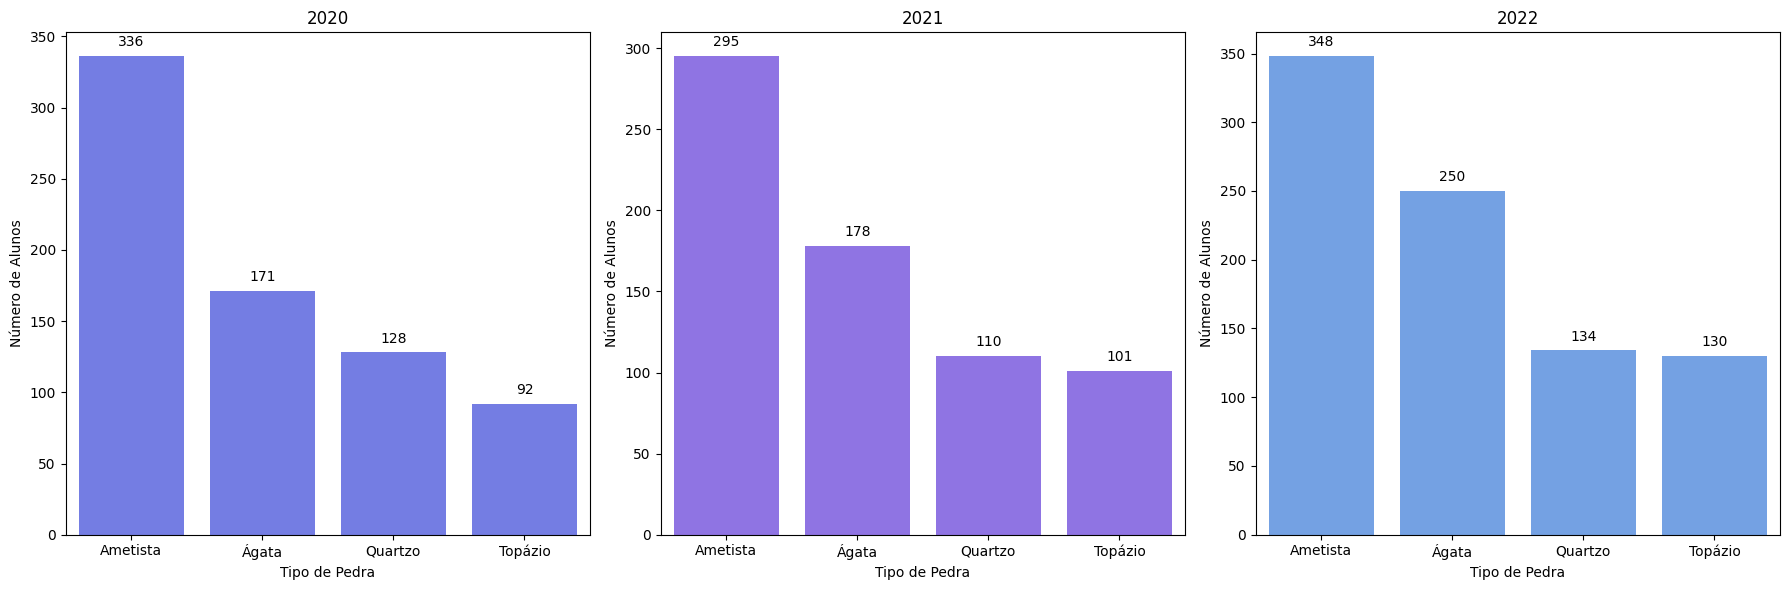

In [47]:
df_grouped_2020 = df_2020_limpo.groupby(['PEDRA']).size().reset_index(name='Alunos')
df_grouped_2021 = df_2021_limpo.groupby(['PEDRA']).size().reset_index(name='Alunos')
df_grouped_2022 = df_2022_limpo.groupby(['PEDRA']).size().reset_index(name='Alunos')

df_grouped_2020 = df_grouped_2020.sort_values(by='Alunos', ascending=False)
df_grouped_2021 = df_grouped_2021.sort_values(by='Alunos', ascending=False)
df_grouped_2022 = df_grouped_2022.sort_values(by='Alunos', ascending=False)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

def add_annotations(ax, data):
    for p in ax.patches:
        value = int(p.get_height())  # Converter o valor para inteiro
        ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Gráfico para 2020
sns.barplot(data=df_grouped_2020, x='PEDRA', y='Alunos', ax=axs[0], color='#626EF5')
axs[0].set_title('2020')
axs[0].set_xlabel('Tipo de Pedra')
axs[0].set_ylabel('Número de Alunos')
add_annotations(axs[0], df_grouped_2020)

# Gráfico para 2021
sns.barplot(data=df_grouped_2021, x='PEDRA', y='Alunos', ax=axs[1], color='#8562F5')
axs[1].set_title('2021')
axs[1].set_xlabel('Tipo de Pedra')
axs[1].set_ylabel('Número de Alunos')
add_annotations(axs[1], df_grouped_2021)

# Gráfico para 2022
sns.barplot(data=df_grouped_2022, x='PEDRA', y='Alunos', ax=axs[2], color='#629DF5')
axs[2].set_title('2022')
axs[2].set_xlabel('Tipo de Pedra')
axs[2].set_ylabel('Número de Alunos')
add_annotations(axs[2], df_grouped_2022)

plt.tight_layout()
plt.show()

In [48]:
df_concat.columns

Index(['INSTITUICAO_ENSINO_ALUNO', 'NOME', 'IDADE_ALUNO', 'ANOS_PM',
       'FASE_TURMA', 'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA',
       'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS',
       'IDA', 'IPP', 'IPV', 'IAN', 'ANO', 'FASE', 'TURMA',
       'SINALIZADOR_INGRESSANTE', 'REC_EQUIPE_1', 'REC_EQUIPE_2',
       'REC_EQUIPE_3', 'REC_EQUIPE_4', 'NIVEL_IDEAL', 'DEFASAGEM',
       'ANO_INGRESSO', 'BOLSISTA', 'CG', 'CF', 'CT', 'NOTA_PORT', 'NOTA_MAT',
       'NOTA_ING', 'QTD_AVAL', 'REC_AVA_1', 'REC_AVA_2', 'REC_AVA_3',
       'REC_AVA_4', 'INDICADO_BOLSA'],
      dtype='object')

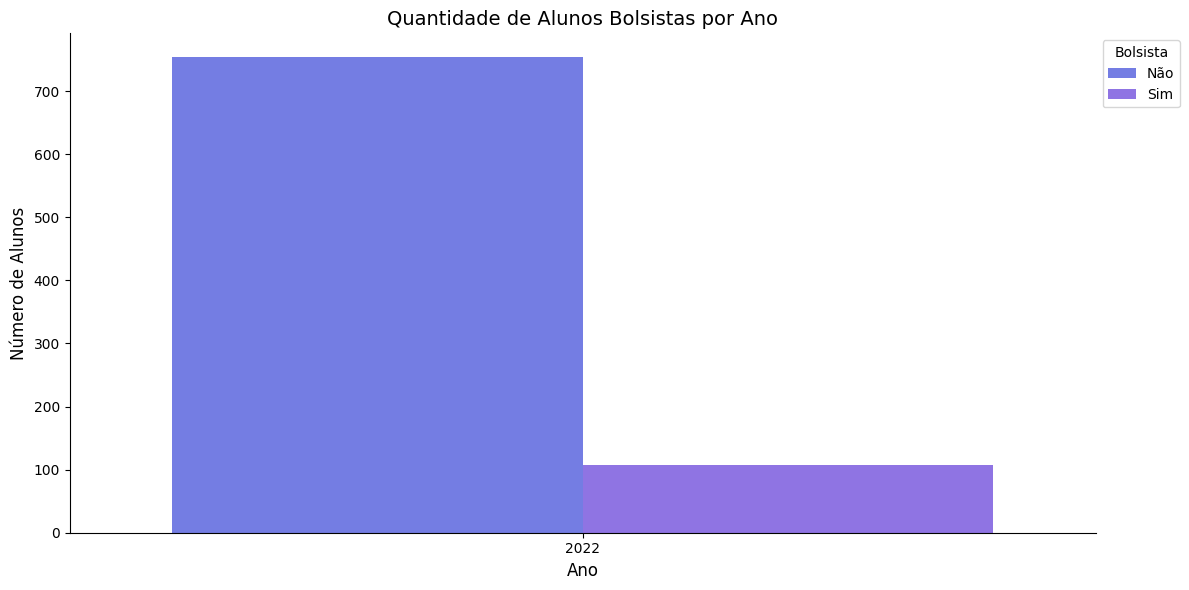

In [122]:
df_grouped = df_concat.groupby(['ANO', 'BOLSISTA']).size().reset_index(name='Alunos')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='ANO', y='Alunos', hue='BOLSISTA', palette=['#626EF5', '#8562F5'])

plt.title('Quantidade de Alunos Bolsistas por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.legend(title='Bolsista', loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.tight_layout()

plt.show()

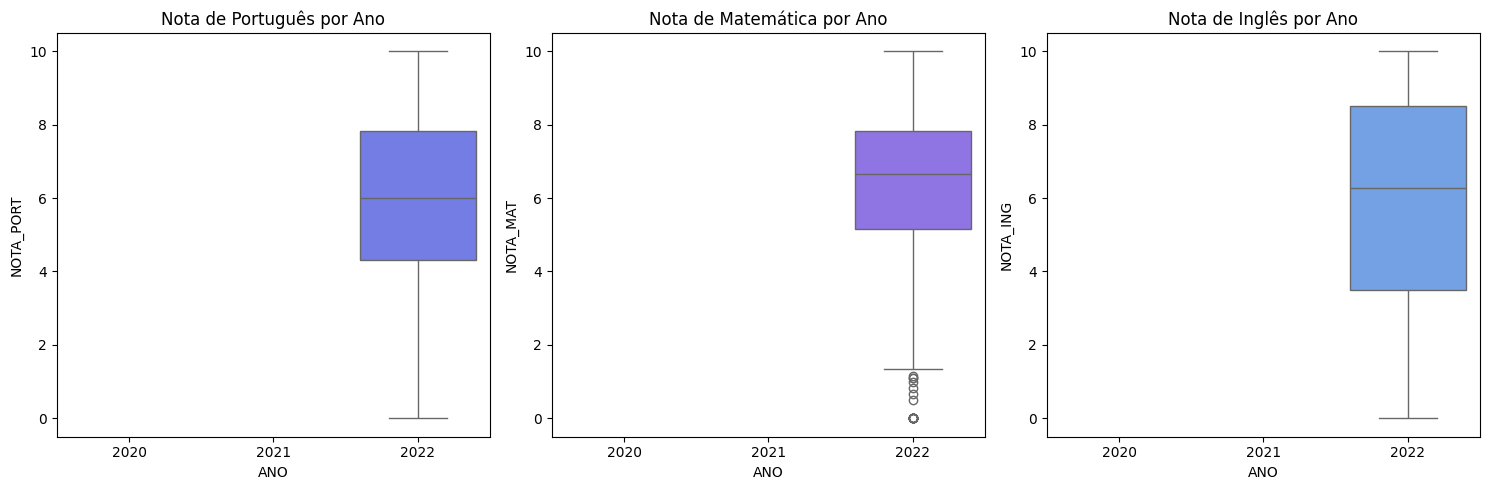

In [50]:
df_notas = df_concat[['ANO', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING']]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_notas, x='ANO', y='NOTA_PORT', color='#626EF5')
plt.title('Nota de Português por Ano')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_notas, x='ANO', y='NOTA_MAT', color='#8562F5')
plt.title('Nota de Matemática por Ano')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_notas, x='ANO', y='NOTA_ING', color='#629DF5')
plt.title('Nota de Inglês por Ano')

plt.tight_layout()
plt.show()

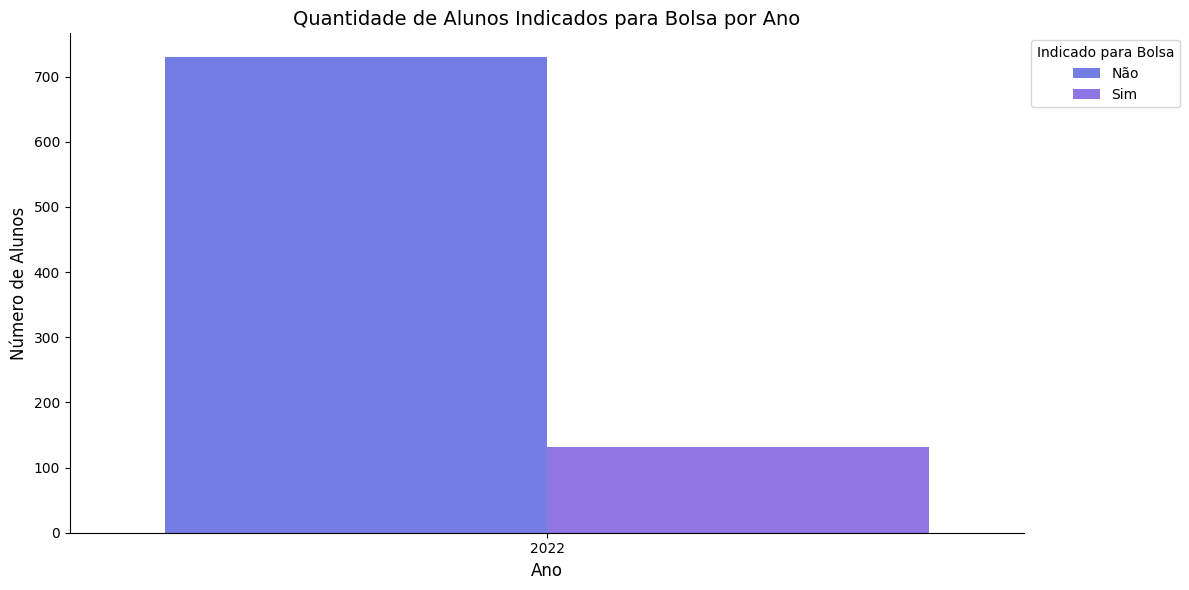

In [135]:
df_grouped = df_concat.groupby(['ANO', 'INDICADO_BOLSA']).size().reset_index(name='Alunos')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='ANO', y='Alunos', hue='INDICADO_BOLSA', palette=['#626EF5', '#8562F5'])

plt.title('Quantidade de Alunos Indicados para Bolsa por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.legend(title='Indicado para Bolsa', loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.tight_layout()

plt.show()

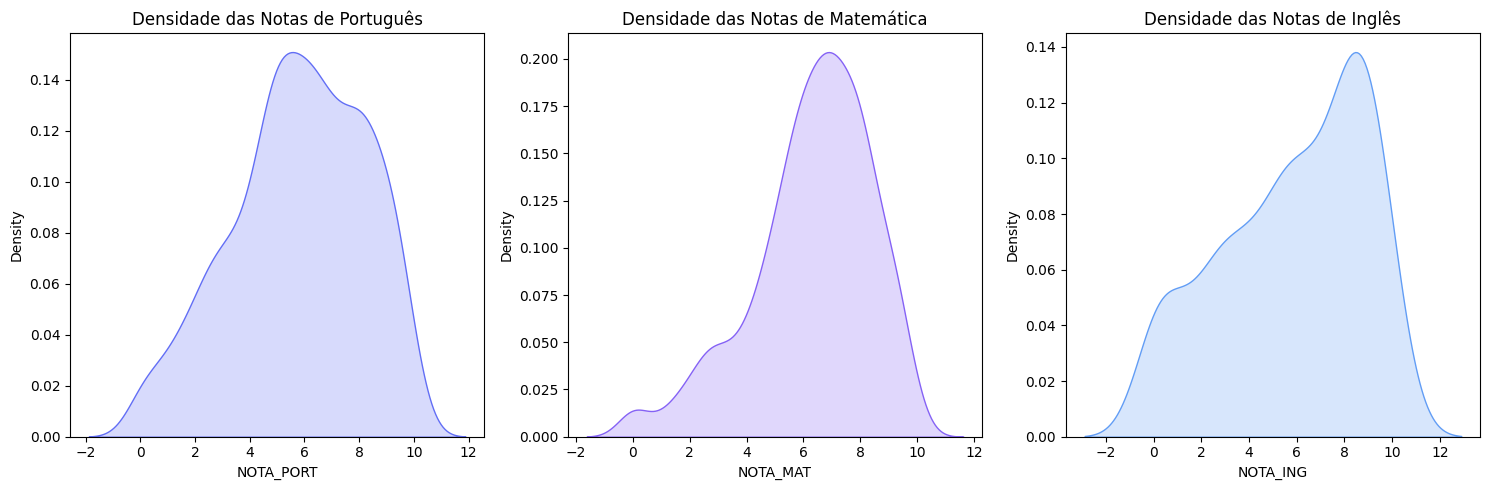

In [134]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(data=df_concat, x='NOTA_PORT', fill=True, color='#626EF5')
plt.title('Densidade das Notas de Português')

plt.subplot(1, 3, 2)
sns.kdeplot(data=df_concat, x='NOTA_MAT', fill=True, color='#8562F5')
plt.title('Densidade das Notas de Matemática')

plt.subplot(1, 3, 3)
sns.kdeplot(data=df_concat, x='NOTA_ING', fill=True, color='#629DF5')
plt.title('Densidade das Notas de Inglês')

plt.tight_layout()
plt.show()


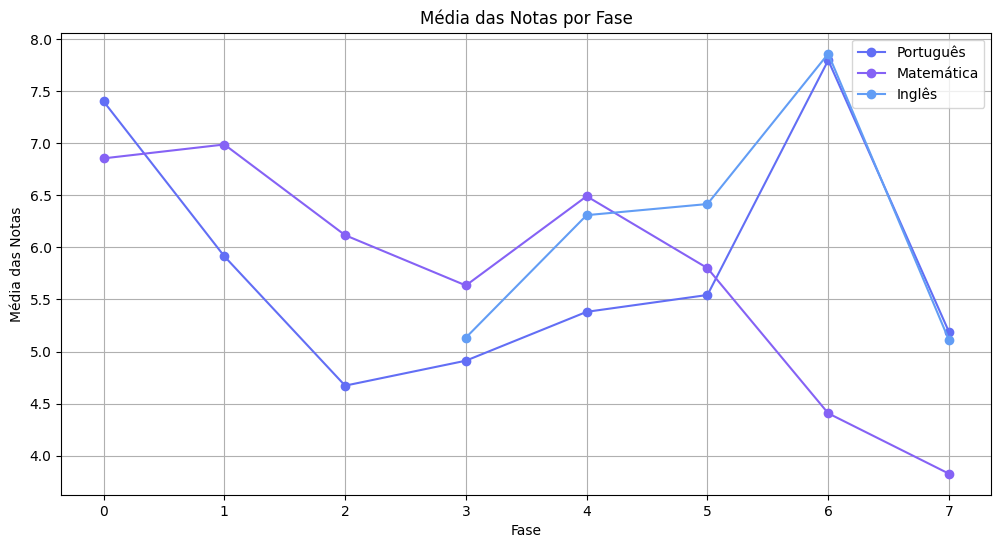

In [53]:
df_grouped = df_concat.groupby('FASE')[['NOTA_PORT', 'NOTA_MAT', 'NOTA_ING']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['FASE'], df_grouped['NOTA_PORT'], label='Português', marker='o', color='#626EF5')
plt.plot(df_grouped['FASE'], df_grouped['NOTA_MAT'], label='Matemática', marker='o', color='#8562F5')
plt.plot(df_grouped['FASE'], df_grouped['NOTA_ING'], label='Inglês', marker='o', color='#629DF5')

plt.title('Média das Notas por Fase')
plt.xlabel('Fase')
plt.ylabel('Média das Notas')

plt.legend()

plt.grid(True)
plt.show()

In [54]:
total_alunos = df_concat['NOME'].nunique()
print(f"Total de alunos em todos os anos: {total_alunos}")

Total de alunos em todos os anos: 1348


ANO
2020    727
2021    684
2022    862
Name: NOME, dtype: int64


<ipython-input-123-0623738c9692>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




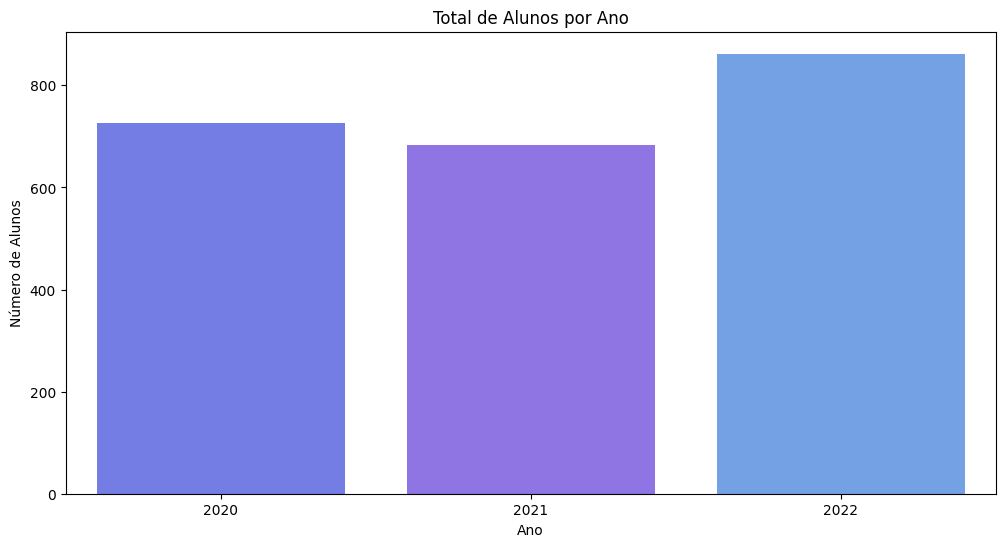

In [123]:
total_alunos_por_ano = df_concat.groupby('ANO')['NOME'].nunique()

# Imprimir o resultado
print(total_alunos_por_ano)

# Criar um gráfico de barras para visualizar o total de alunos por ano
plt.figure(figsize=(12, 6))
sns.barplot(x=total_alunos_por_ano.index, y=total_alunos_por_ano.values, palette=['#626EF5', '#8562F5', '#629DF5'])
plt.title('Total de Alunos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.show()


Número de alunos que saíram após 2020: 272
Número de alunos que saíram após 2021: 227


<ipython-input-124-c52e0b07d7d4>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




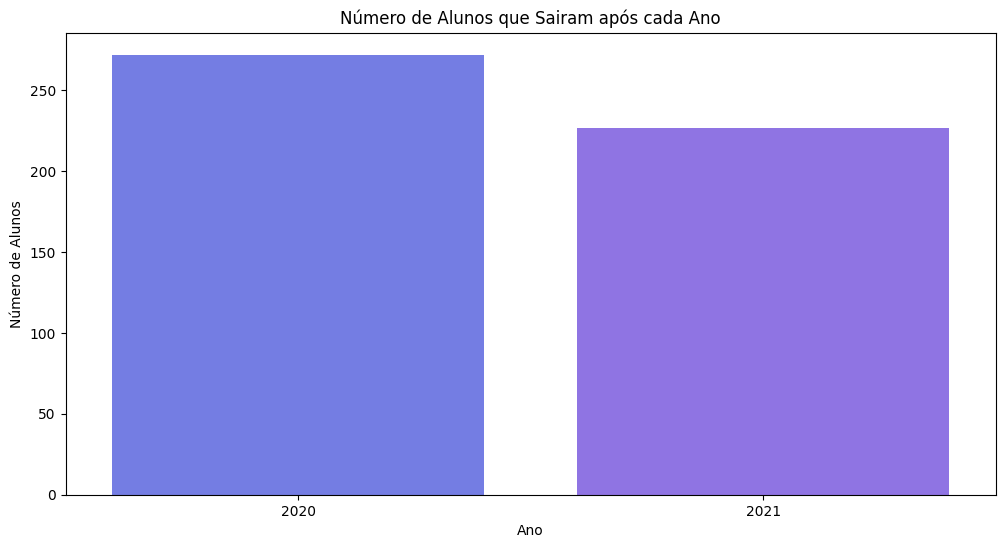

In [124]:
alunos_2020 = set(df_2020_limpo['NOME'].unique())
alunos_2021 = set(df_2021_limpo['NOME'].unique())
alunos_2022 = set(df_2022_limpo['NOME'].unique())

sairam_apos_2020 = alunos_2020 - alunos_2021
sairam_apos_2021 = alunos_2021 - alunos_2022

print(f"Número de alunos que saíram após 2020: {len(sairam_apos_2020)}")
print(f"Número de alunos que saíram após 2021: {len(sairam_apos_2021)}")

dados_saida = {'Ano': ['2020', '2021'], 'Alunos que Sairam': [len(sairam_apos_2020), len(sairam_apos_2021)]}
df_saida = pd.DataFrame(dados_saida)

plt.figure(figsize=(12, 6))
sns.barplot(x='Ano', y='Alunos que Sairam', data=df_saida, palette=['#626EF5', '#8562F5'])
plt.title('Número de Alunos que Sairam após cada Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.show()

Número de alunos que saíram após 2021: 227
Número de alunos que entraram em 2022: 405


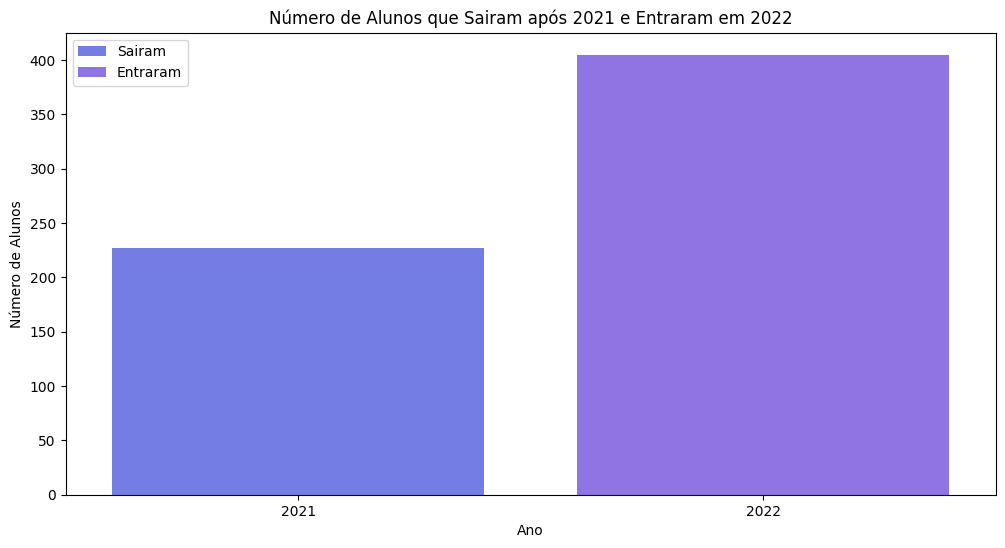

In [125]:
alunos_2021 = set(df_2021_limpo['NOME'].unique())
alunos_2022 = set(df_2022_limpo['NOME'].unique())

sairam_apos_2021 = alunos_2021 - alunos_2022

entraram_em_2022 = alunos_2022 - alunos_2021

print(f"Número de alunos que saíram após 2021: {len(sairam_apos_2021)}")
print(f"Número de alunos que entraram em 2022: {len(entraram_em_2022)}")

dados_saida_entrada = {'Ano': ['2021', '2022'], 'Alunos que Sairam': [len(sairam_apos_2021), 0], 'Alunos que Entraram': [0, len(entraram_em_2022)]}
df_saida_entrada = pd.DataFrame(dados_saida_entrada)

plt.figure(figsize=(12, 6))
sns.barplot(x='Ano', y='Alunos que Sairam', data=df_saida_entrada, color='#626EF5', label='Sairam')
sns.barplot(x='Ano', y='Alunos que Entraram', data=df_saida_entrada, color='#8562F5', label='Entraram')
plt.title('Número de Alunos que Sairam após 2021 e Entraram em 2022')
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.legend()
plt.show()


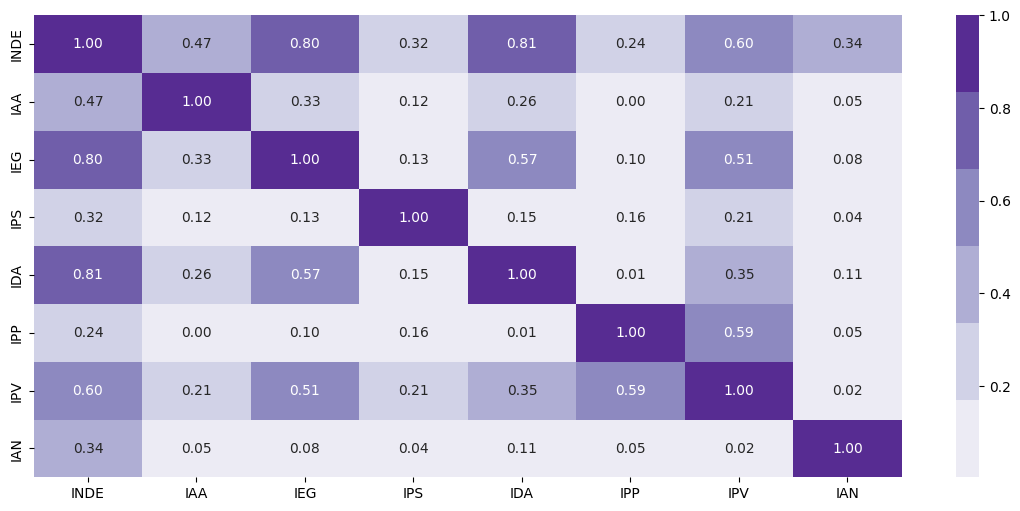

In [126]:
correlation_data = df_concat[['INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN']]

color = sns.color_palette(palette='Purples')

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(14, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=color, fmt=".2f")
plt.show()

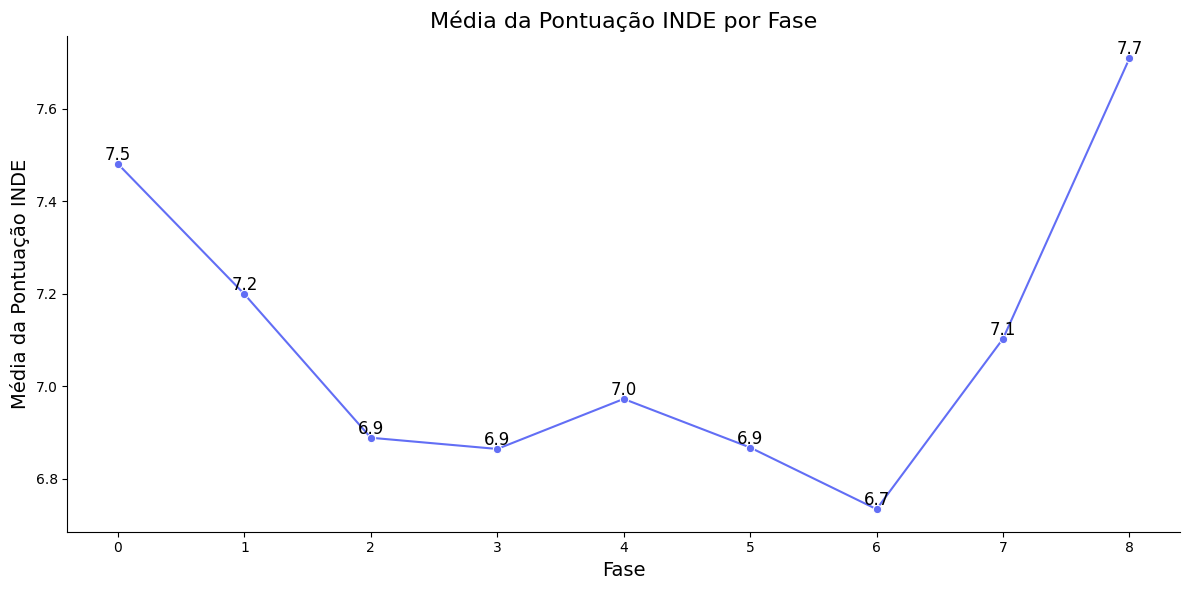

In [132]:
plt.figure(figsize=(12, 6))

df_grouped = df_concat.groupby('FASE')['INDE'].mean().reset_index()
lineplot = sns.lineplot(data=df_grouped, x='FASE', y='INDE', marker='o', color='#626EF5')

for index, row in df_grouped.iterrows():
    lineplot.text(row['FASE'], row['INDE'],
                  round(row['INDE'], 1),
                  color='black',
                  ha="center",
                  va="bottom",
                  fontsize=12)

plt.title('Média da Pontuação INDE por Fase', fontsize=16)
plt.xlabel('Fase', fontsize=14)
plt.ylabel('Média da Pontuação INDE', fontsize=14)
sns.despine()
plt.tight_layout()

plt.show()

In [61]:
pedras_unicas = df_concat['PEDRA'].unique()
print(pedras_unicas)

['Ametista' 'Quartzo' 'Topázio' 'Ágata']


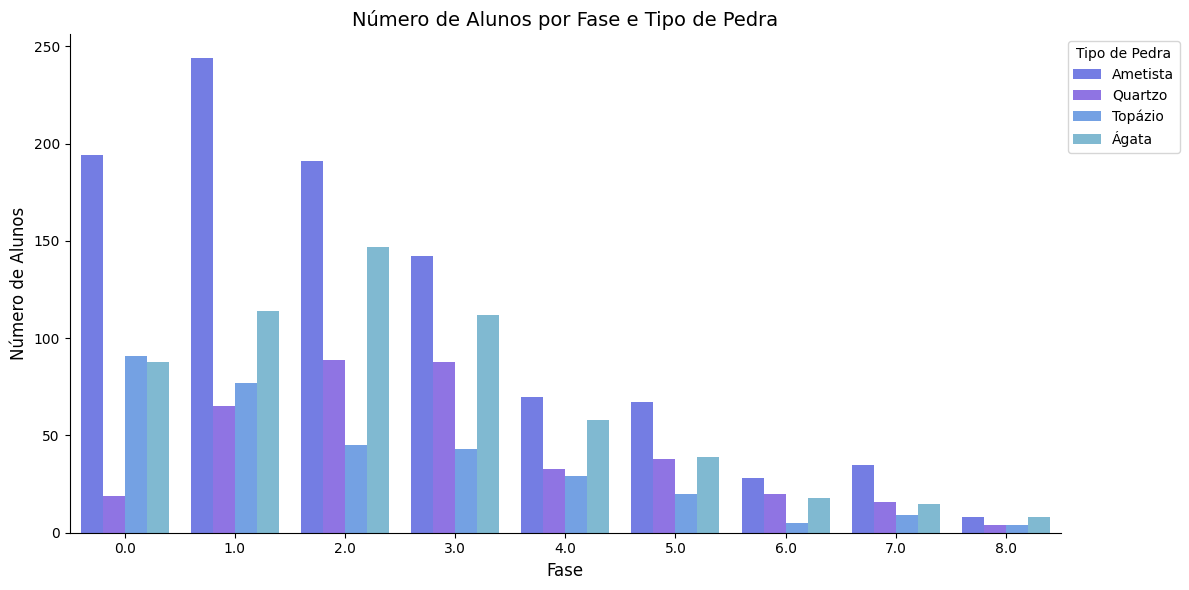

In [129]:

df_grouped = df_concat.groupby(['FASE', 'PEDRA']).size().reset_index(name='Alunos')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='FASE', y='Alunos', hue='PEDRA', palette=['#626EF5', '#8562F5', '#629DF5', '#73BFDE'])

# Ajustar a aparência do gráfico
plt.title('Número de Alunos por Fase e Tipo de Pedra', fontsize=14)
plt.xlabel('Fase', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.legend(title='Tipo de Pedra', loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.tight_layout()

# Exibir o gráfico
plt.show()


<ipython-input-131-b7f43b01e59b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




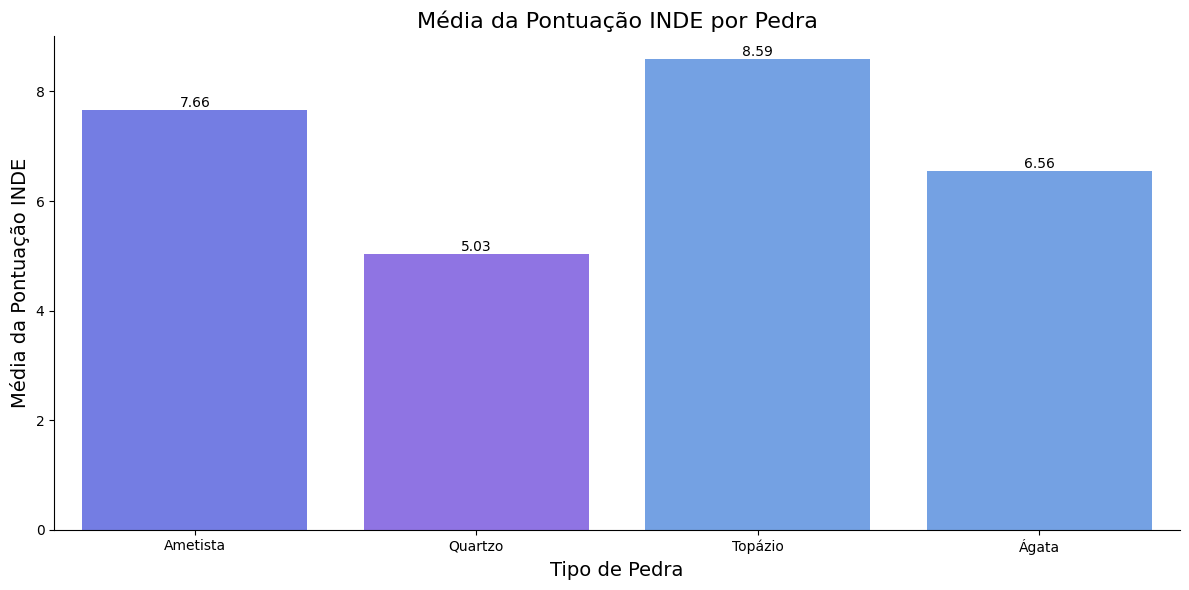

In [131]:
df_grouped = df_concat.groupby('PEDRA')['INDE'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='PEDRA', y='INDE', palette=['#626EF5', '#8562F5', '#629DF5', '#629DF5'])

plt.title('Média da Pontuação INDE por Pedra', fontsize=16)
plt.xlabel('Tipo de Pedra', fontsize=14)
plt.ylabel('Média da Pontuação INDE', fontsize=14)
sns.despine()
plt.tight_layout()

for index, row in df_grouped.iterrows():
    plt.text(index, row['INDE'], round(row['INDE'], 2), ha='center', va='bottom')


plt.show()